In [1]:
#Question 1

import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')
users = pd.read_csv(url, sep='|')
users.groupby('occupation')['age'].mean()

def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
users['gender_n'] = users['gender'].apply(gender_to_numeric)
(users.groupby('occupation')['gender_n'].sum() / users.groupby('occupation')['gender_n'].count()).sort_values(ascending=False)
users.groupby('occupation')['age'].agg(['min', 'max'])
users.groupby(['occupation', 'gender'])['age'].mean()
gender_counts = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
total_counts = users.groupby('occupation').agg('count')
occup_gender_perc = (gender_counts / total_counts) * 100
occup_gender_perc = occup_gender_perc.rename(columns={'gender': 'gender_perc'}).loc[:, 'gender_perc'].unstack()
print(occup_gender_perc)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


In [2]:
#Question 2

import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
euro12 = pd.read_csv(url)
euro12['Goals']
len(euro12['Team'].unique())
len(euro12.columns)
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
euro12.groupby('Team')['Yellow Cards'].mean()
euro12[euro12['Goals'] > 6]['Team']
euro12[euro12['Team'].str.startswith('G')]['Team']
euro12.iloc[:, :7]
euro12.iloc[:, :-3]
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [3]:
#Question 3

import pandas as pd
import numpy as np

bedrs = pd.Series(np.random.randint(1, 5, 100))
bathrs = pd.Series(np.random.randint(1, 4, 100))
price_sqr_meter = pd.Series(np.random.randint(10000, 30001, 100))
house_data = pd.concat([bedrs, bathrs, price_sqr_meter], axis=1)
house_data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
bigcolumn = pd.concat([bedrs, bathrs, price_sqr_meter], axis=0)
bigcolumn = bigcolumn.to_frame()
bigcolumn.reset_index(drop=True, inplace=True)


In [ ]:
#Question 4

import pandas as pd
import numpy as np

data = pd.read_csv('wind.txt')
data['Yr'] = data['Yr'].astype(str)
data['Mo'] = data['Mo'].astype(str)
data['Dy'] = data['Dy'].astype(str)
data['date'] = data['Yr'] + '-' + data['Mo'] + '-' + data['Dy']
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)
data.index = data.index.map(fix_year)
data.index = pd.to_datetime(data.index)
data.notna().sum().sum()
data.mean().mean()
loc_stats = data.describe()
day_stats = data.groupby(data.index).agg([np.mean, np.std])
data[data.index.month == 1].mean()
data_yearly = data.resample('Y').mean()
data_monthly = data.resample('M').mean()
data_weekly = data.resample('W').mean()
data_weekly[0:52].agg([np.min, np.max, np.mean, np.std])

In [5]:
#Question 5

import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo = pd.read_csv(url, sep='\t')
print(chipo.head(10))
print(len(chipo))
print(len(chipo.columns))
print(chipo.columns)
print(chipo.index)
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(most_ordered_item)
item_qty = chipo.loc[chipo['item_name'] == most_ordered_item, 'quantity'].sum()
print(item_qty)
most_ordered_description = chipo['choice_description'].value_counts().idxmax()
print(most_ordered_description)
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))
print(chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: '{:.2f}'.format(x))
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print(chipo['item_price'].dtype)
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)
orders = chipo['order_id'].nunique()
print(orders)
avg_revenue_per_order = revenue / orders
print(avg_revenue_per_order)
num_items_sold = chipo['item_name'].nunique()
print(num_items_sold)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

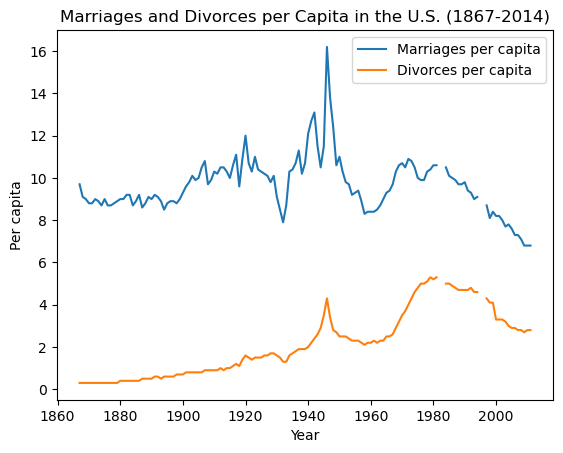

In [6]:
#Question 6

import pandas as pd
import matplotlib.pyplot as plt

marriage_divorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce = marriage_divorce[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
plt.plot(us_marriage_divorce['Year'], us_marriage_divorce['Marriages_per_1000'], label='Marriages per capita')
plt.plot(us_marriage_divorce['Year'], us_marriage_divorce['Divorces_per_1000'], label='Divorces per capita')
plt.xlabel('Year')
plt.ylabel('Per capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.show()

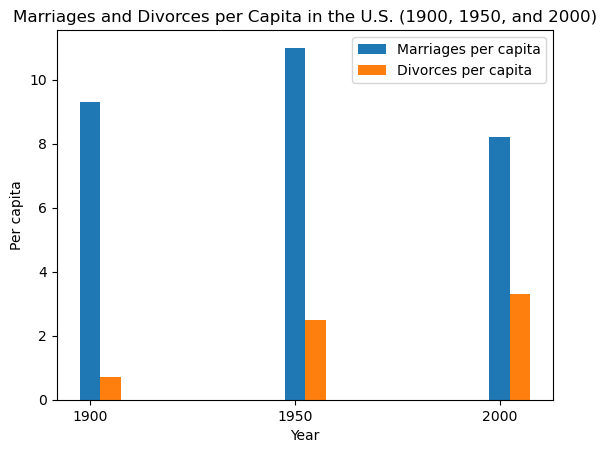

In [7]:
#Question 7

import pandas as pd
import matplotlib.pyplot as plt

marriage_divorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce = marriage_divorce[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
us_marriage_divorce = us_marriage_divorce.loc[(us_marriage_divorce['Year'] == 1900) | (us_marriage_divorce['Year'] == 1950) | (us_marriage_divorce['Year'] == 2000)]
plt.bar(us_marriage_divorce['Year'] - 5, us_marriage_divorce['Marriages_per_1000'], width=5, label='Marriages per capita')
plt.bar(us_marriage_divorce['Year'], us_marriage_divorce['Divorces_per_1000'], width=5, label='Divorces per capita')
plt.xlabel('Year')
plt.ylabel('Per capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')
plt.xticks([1895, 1945, 1995], ['1900', '1950', '2000'])
plt.legend()
plt.show()


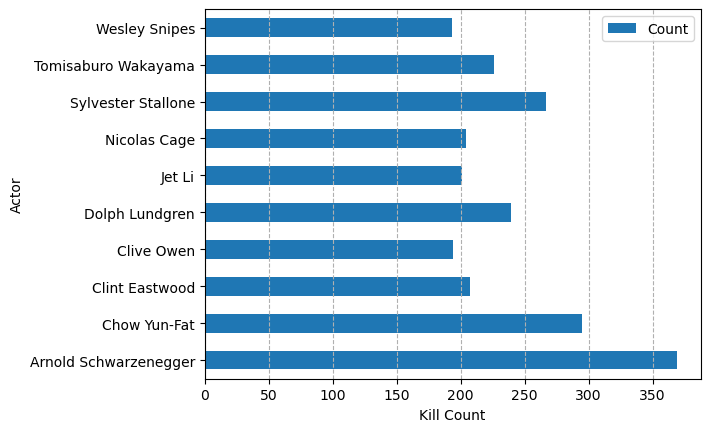

In [8]:
#Question 8

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('actor_kill_counts.csv')
df.plot.barh(x='Actor', y='Count')
plt.ylabel('Actor')
plt.xlabel('Kill Count')
plt.grid(axis='x', linestyle = '--')
plt.show()

               Emperor  Length_of_Reign         Cause_of_Death
0             Augustus            40.58  Possibly assassinated
1             Tiberius            22.50  Possibly assassinated
2             Caligula             4.83           Assassinated
3             Claudius            13.75  Possibly assassinated
5                Galba             0.58           Assassinated
7            Vitellius             0.67           Assassinated
10            Domitian            15.00           Assassinated
17            Commodus            15.00           Assassinated
18            Pertinax             0.25           Assassinated
21           Caracalla            19.00           Assassinated
22                Geta             3.00           Assassinated
24          Elagabalus             3.75           Assassinated
25   Severus Alexander            13.00           Assassinated
26         Maximinus I             3.25           Assassinated
29            Pupienus             0.25           Assas

([<matplotlib.patches.Wedge at 0x1b08574c820>,
 [Text(5.388445916248355e-16, 8.8, 'Augustus'),
  Text(-0.06355350556839466, 8.799770505639904, 'Tiberius'),
  Text(-0.25418087519481225, 8.796328329631928, 'Caligula'),
  Text(-0.5715838525916983, 8.781417419725386, 'Claudius'),
  Text(-1.014603498093826, 8.741314531674043, 'Galba'),
  Text(-1.5802330760233507, 8.656954627664499, 'Vitellius'),
  Text(-2.2622567580796455, 8.504245666755105, 'Domitian'),
  Text(-3.0495563976684283, 8.254708097651882, 'Commodus'),
  Text(-3.924170701120674, 7.876603602344484, 'Pertinax'),
  Text(-4.859253435988567, 7.336733336085844, 'Caracalla'),
  Text(-5.817160387583082, 6.6030784506269695, 'Geta'),
  Text(-6.747994822848904, 5.648412685950311, 'Elagabalus'),
  Text(-7.589048035193822, 4.454924232747489, 'Severus Alexander'),
  Text(-8.265666264955097, 3.0197286627084967, 'Maximinus I'),
  Text(-8.694128733123023, 1.3609282023254161, 'Pupienus'),
  Text(-8.787094044773891, -0.4764223423594041, 'Balbinus')

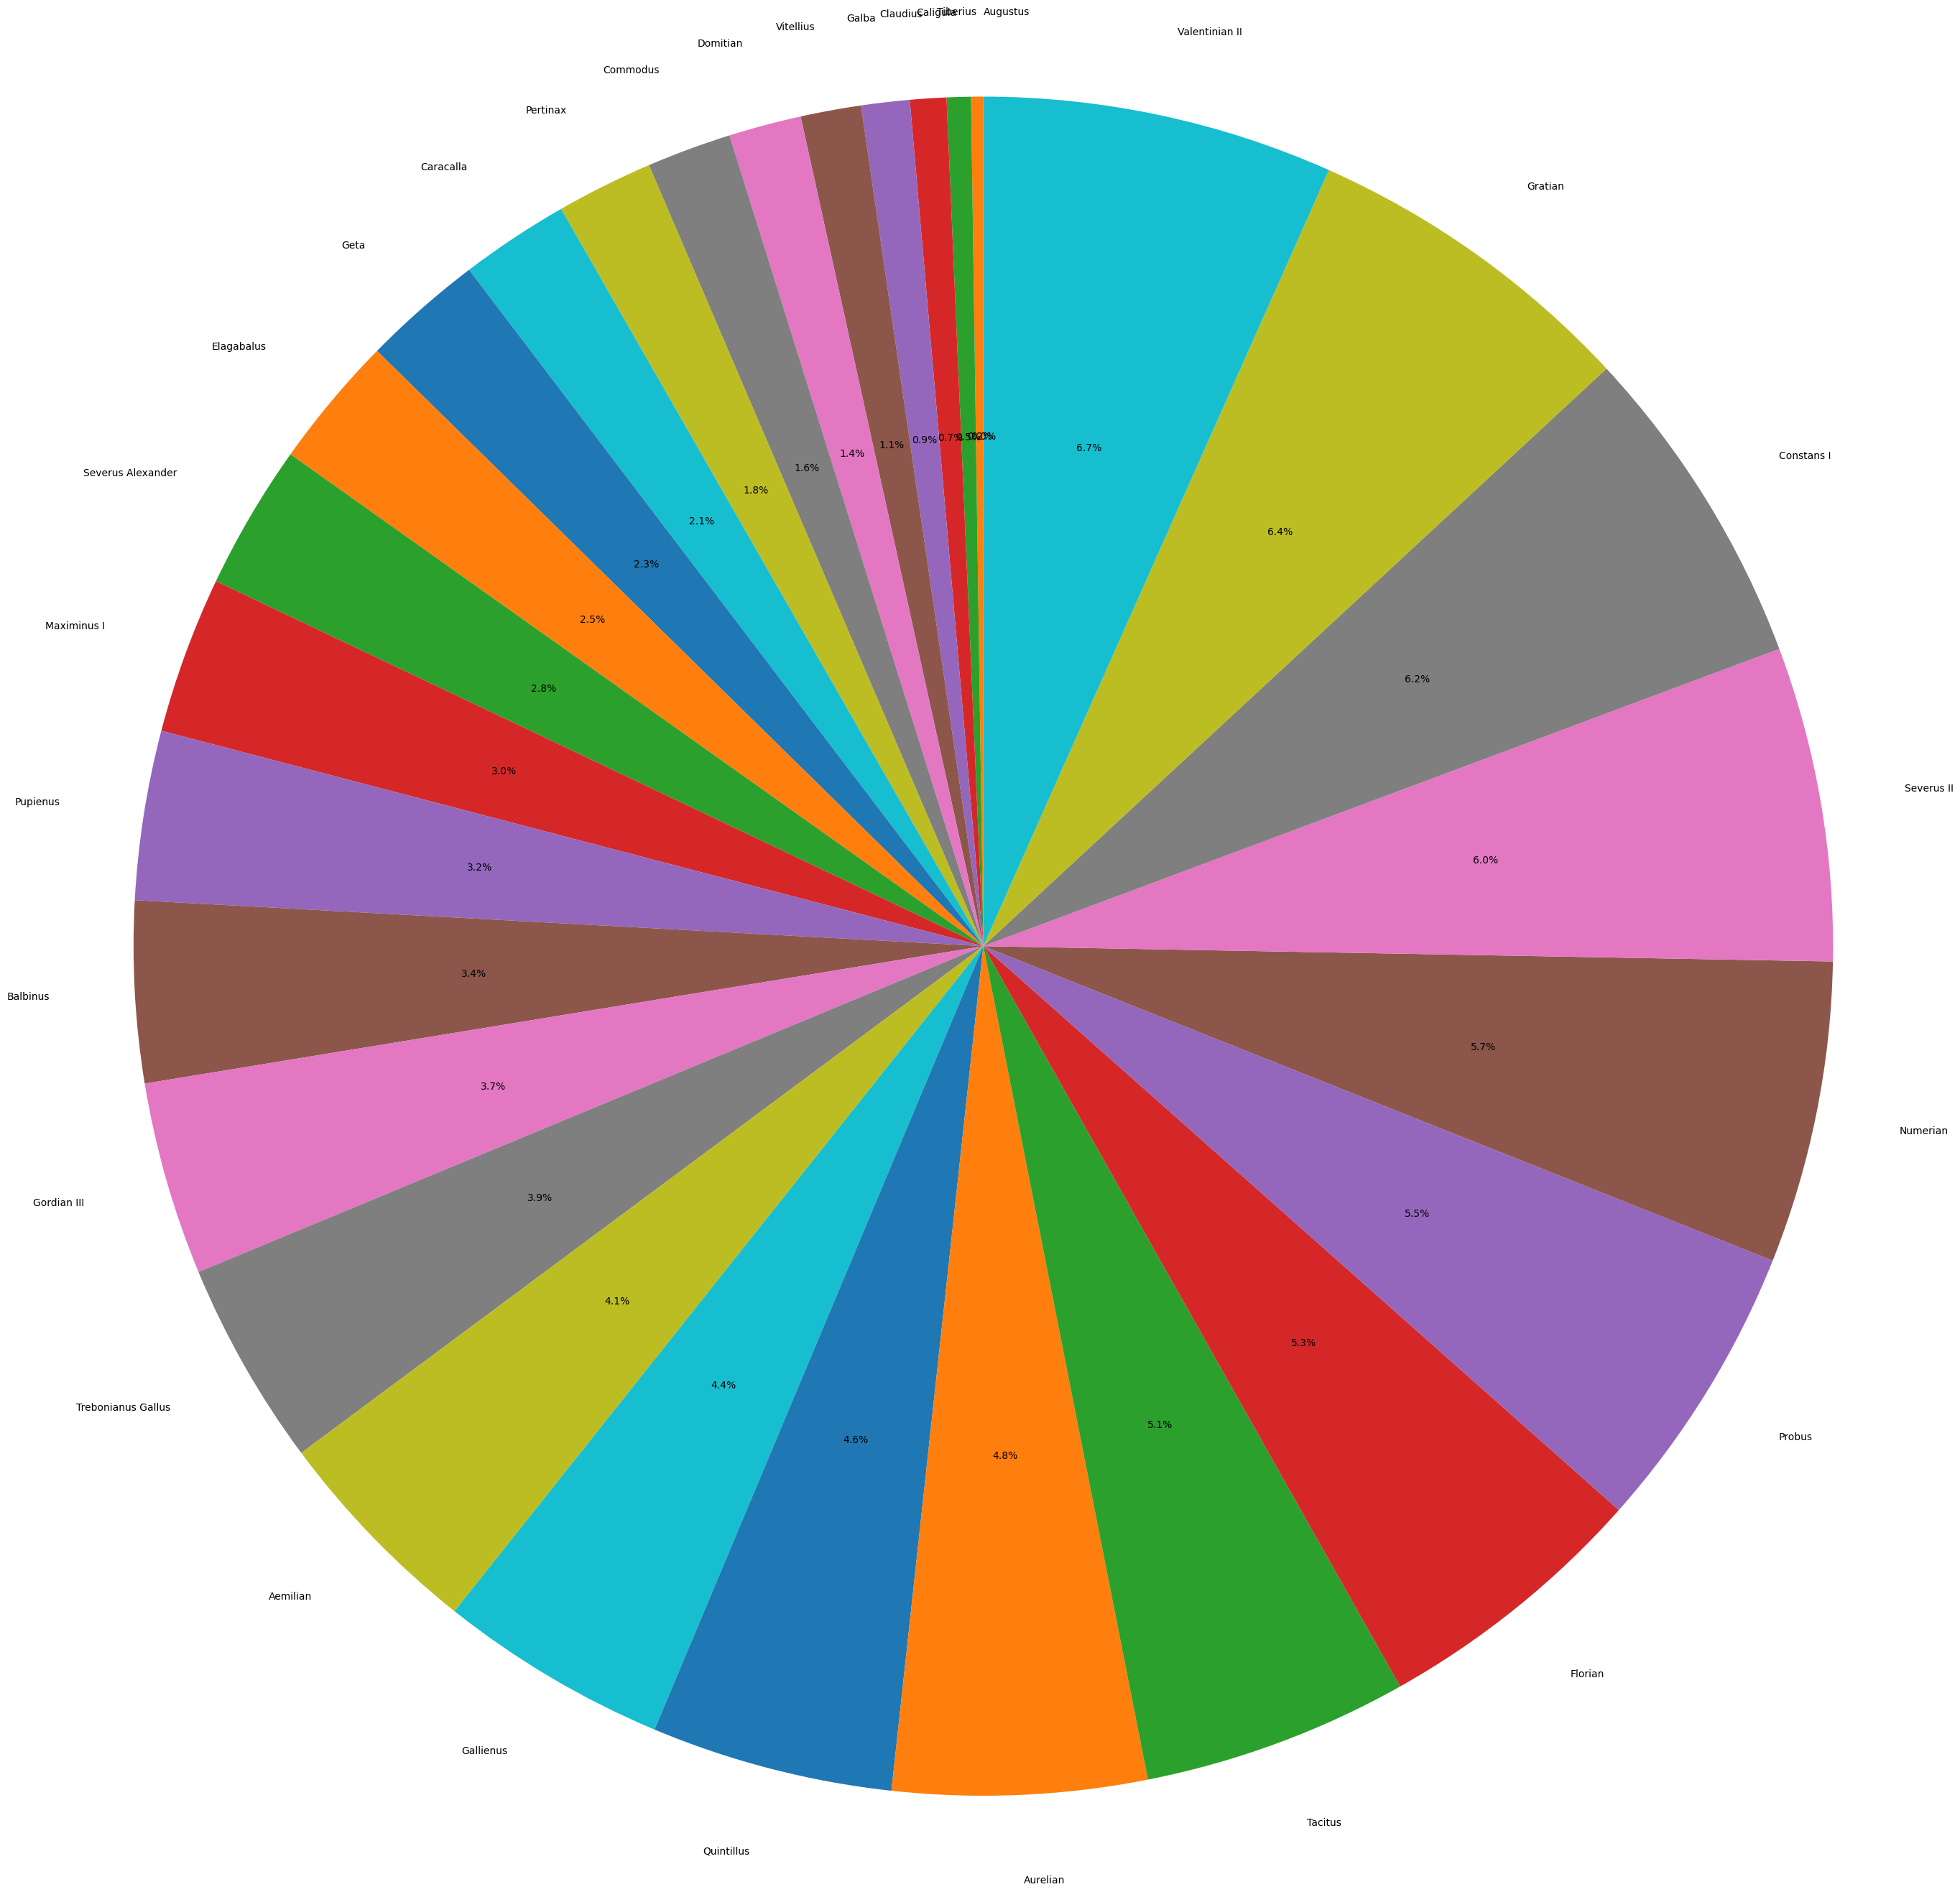

In [9]:
#Question 9

import matplotlib.pyplot as plt
import pandas as pd

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[
roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

print(assassinated_emperors)
number_assassinated = len(assassinated_emperors)
print(number_assassinated)
other_deaths = len(roman_emperors) - number_assassinated
print(other_deaths)
emperor = assassinated_emperors["Emperor"]
cause_of_death = assassinated_emperors["Cause_of_Death"]
plt.pie(range(len(cause_of_death)), labels=emperor,autopct='%1.1f%%', startangle=90, radius=0.08 * 100)

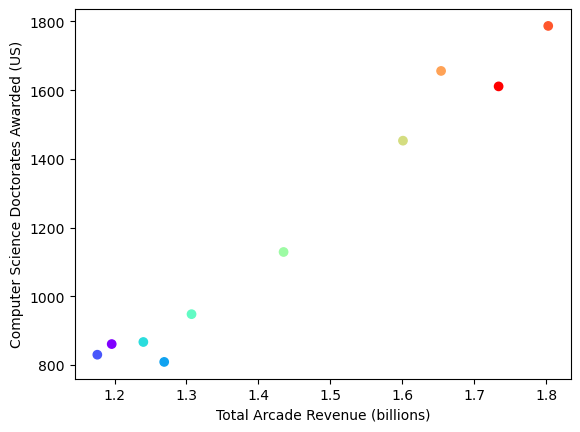

In [10]:
#Question 10

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')
plt.scatter(x="Total Arcade Revenue (billions)",y="Computer Science Doctorates Awarded (US)",c=data.Year,cmap="rainbow",data=data)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.show()